### Assigment 4 (AA609)

## Smoothing through convolution

### Submitted by - Anushka Agarwal (2303121004)


* Importing necessary libraries and Setting figure parameters





In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

#figure parameters
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13

* Generating a 3D grid of size 64 $\times$ 64 $\times$ 64
* Generating a Gaussian random field with mean 0 and sigma 1

In [25]:
N = 64
x = np.linspace(-10,10,N,endpoint=True)
y = np.linspace(-10,10,N,endpoint=True)
z = np.linspace(-10,10,N,endpoint=True)
X,Y,Z = np.meshgrid(x,y,z)

grid = np.random.normal(0,1,(N,N,N))

* Defining a plotting function

In [26]:
def plott(kind,title):
  axs = fig.add_subplot(111, projection ='3d')
  axs.tick_params(labelsize=13,size = 14)
  axs.scatter(X.flatten(),Y.flatten(),Z.flatten(), c = kind, cmap='Spectral')
  axs.set_xlabel('X', fontsize=15)
  axs.set_ylabel('Y', fontsize=15)
  axs.set_zlabel('Z', fontsize=15)
  axs.set_title(f'{title}', fontsize=20)
  plt.colorbar(axs.scatter(X.flatten(),Y.flatten(),Z.flatten(), c = kind, cmap='Spectral'))

* Plotting Gaussian random field in 3D and with 2D slices

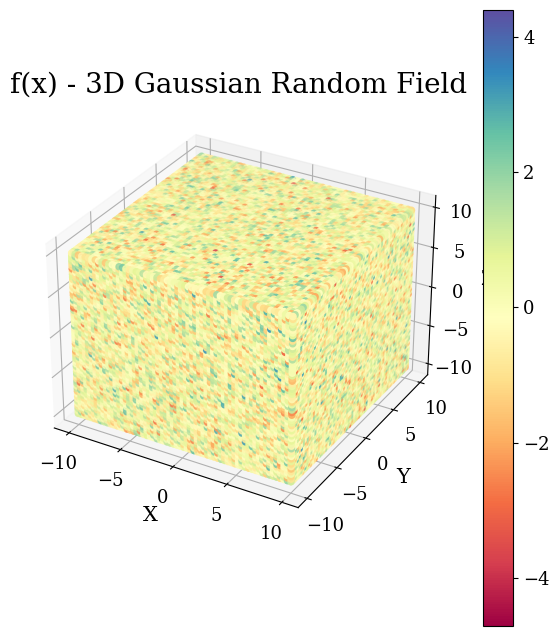

Text(0.5, 1.0, 'Middle 2D slice from 3D plot')

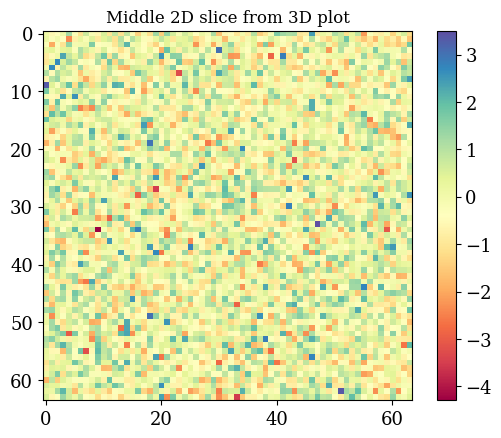

In [27]:
fig = plt.figure(figsize=(7,8))
plott(grid,'f(x) - 3D Gaussian Random Field')
plt.show()

#one of the slice from middle
m = plt.imshow(grid[:,:,31],cmap='Spectral')
plt.colorbar()
plt.title('Middle 2D slice from 3D plot')

Defining a sphere filter

* With its centre at the centre of the grid

* All the cells inside the sphere have a value of 1 and all outside have a value of 0.

In [28]:
def filter_sphere(radius, N, normalisation = False):
    sw = np.zeros((N,N,N)) #a 3D array to store the spherical window
    origin = int(N/2) - 1  #origin of the grid
    x = np.arange(-origin,-origin +N) #1D array representing the x-coordinate
    y = np.arange(-origin,-origin +N) #1D array representing the y-coordinate
    z = np.arange(-origin,-origin +N) #1D array representing the z-coordinate

    X,Y,Z = np.meshgrid(x,y,z)

    grid_radius = np.sqrt(X**2+Y**2+Z**2)

    sw[grid_radius<=radius] = 1.0

    if normalisation == True :
        sw = sw/ np.sum(sw)

    return sw

Visualising the Filter

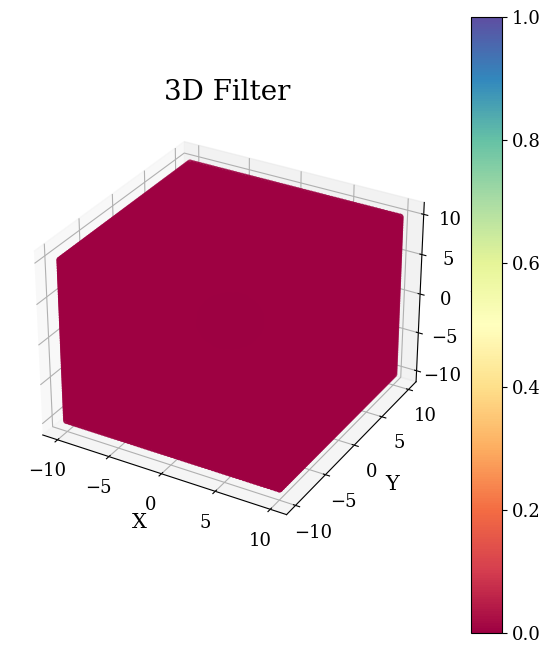

Text(0.5, 1.0, 'Middle Slice')

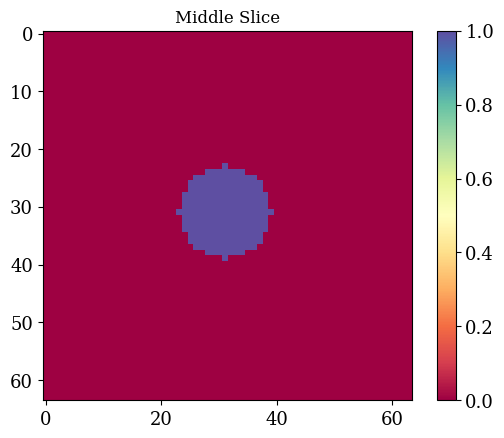

In [29]:
fig = plt.figure(figsize=(7,8))
fil = filter_sphere(8,64)
plott(fil,'3D Filter')
plt.show()

#one of the slice from middle
m = plt.imshow(fil[:,:,31],cmap='Spectral')
plt.colorbar()
plt.title('Middle Slice')

Defining a function which
* Fourier transform (FT) both the grids containing the Gaussian random field and sphere filter
*  Multiply these two Fourier-transformed grids
* Back FT the product grid and return it

In [30]:
def transf(grid,sphere_grid):
    fft_grid = np.fft.fftn(grid)
    fft_grid_shift = np.fft.fftshift(fft_grid)

    fft_sphere = np.fft.fftn(sphere_grid)
    fft_sphere_shift = np.fft.fftn(sphere_grid)

    product_fg = fft_grid_shift*fft_sphere_shift

    invFT = np.fft.ifftn(product_fg)

    return invFT

Plotting Back Fourier Transform
* for radius = 1 grid in sphere filter

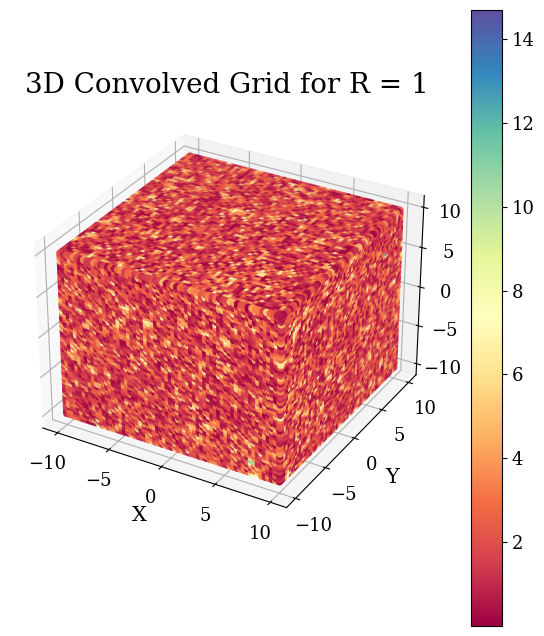

In [31]:
sphere_grid  = filter_sphere(1,64)

fff = np.abs(transf(grid,sphere_grid))
fig = plt.figure(figsize=(7,8))
plott(fff,'3D Convolved Grid for R = 1')

Plotting the field for various smoothing scales (different radius basically)
* R = 5,15,25,32

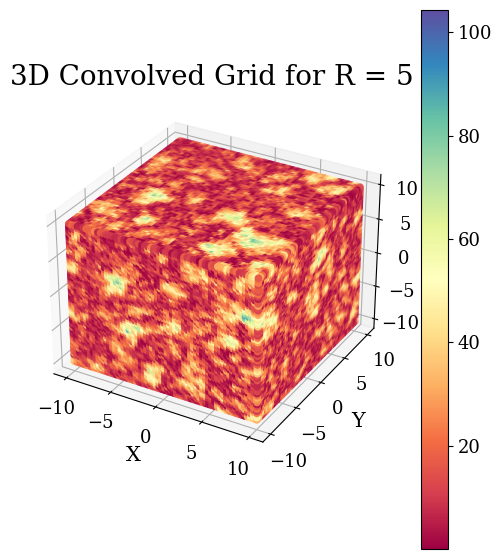

In [32]:
fig = plt.figure(figsize=(6,7))
sphere_grid  = filter_sphere(5,64)
fff = np.abs(transf(grid,sphere_grid))
plott(fff,'3D Convolved Grid for R = 5')
plt.show()

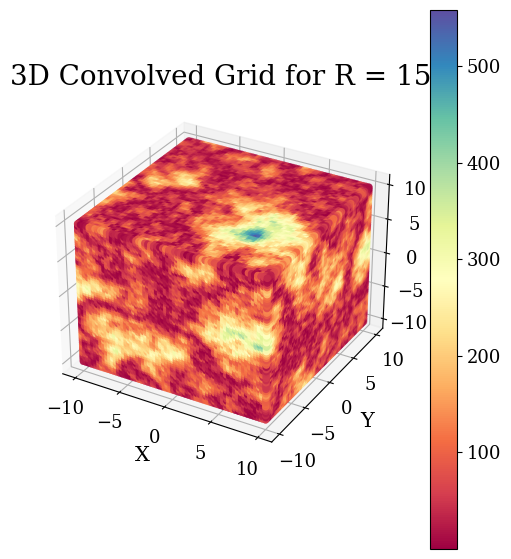

In [33]:
fig = plt.figure(figsize=(6,7))
sphere_grid  = filter_sphere(15,64)
fff = np.abs(transf(grid,sphere_grid))
plott(fff,'3D Convolved Grid for R = 15')
plt.show()

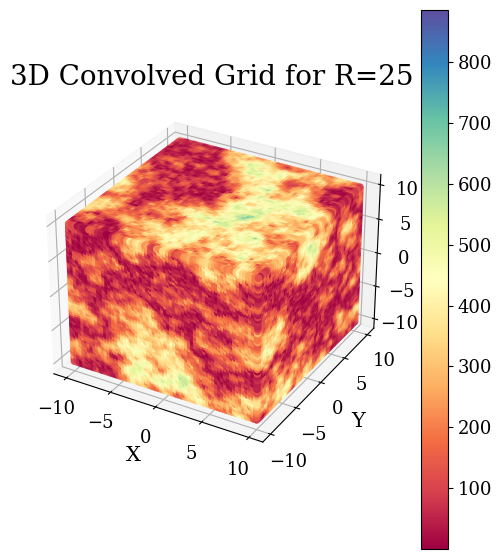

In [34]:
fig = plt.figure(figsize=(6,7))
sphere_grid  = filter_sphere(25,64)
fff = np.abs(transf(grid,sphere_grid))
plott(fff,'3D Convolved Grid for R=25')
plt.show()

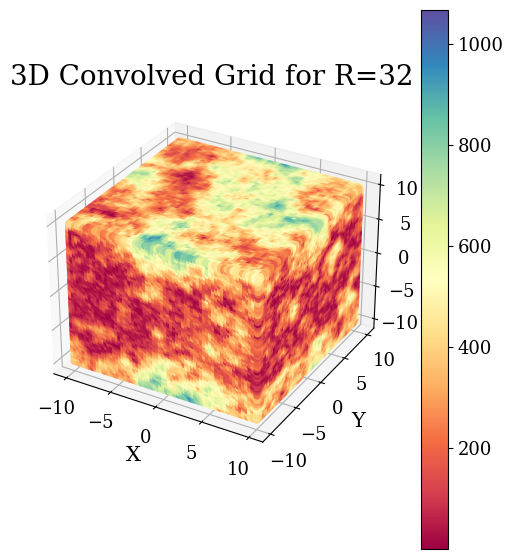

In [35]:
fig = plt.figure(figsize=(6,7))
sphere_grid  = filter_sphere(32,64)
fff = np.abs(transf(grid,sphere_grid))
plott(fff,'3D Convolved Grid for R=32')
plt.show()

* Plotting the mean and variance of the smoothed field as a function of smoothing radii

Text(0.5, 1.0, 'Variance as a function of radii')

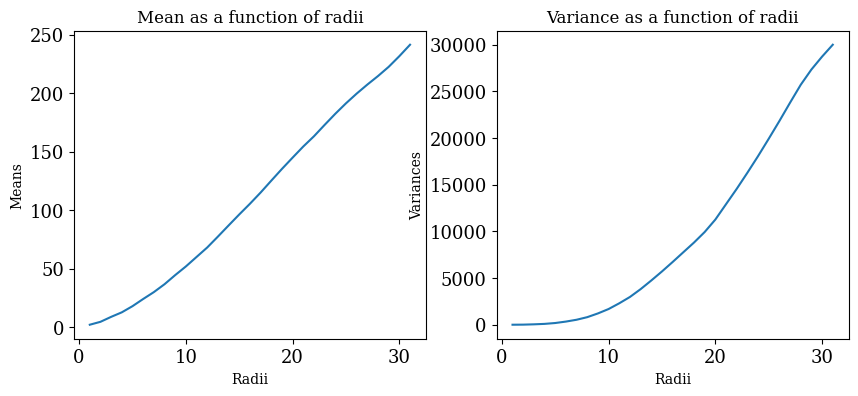

In [36]:
means=[]
variances=[]
radii = range(1,32)

for i in radii:
  sphere_grid  = filter_sphere(i,64)
  fff = np.abs(transf(grid,sphere_grid))
  means.append(np.mean(fff))
  variances.append(np.var(fff))

fig,axs = plt.subplots(1,2,figsize=(10,4))

axs[0].plot(radii, means)
axs[0].set_xlabel('radii')
axs[0].set_xlabel('Radii')
axs[0].set_ylabel('Means')
axs[0].set_title('Mean as a function of radii')

axs[1].plot(radii, variances)
axs[1].set_xlabel('Radii')
axs[1].set_ylabel('Variances')
axs[1].set_title('Variance as a function of radii')

**After Normalisation**
* Graph
* Variation of mean and variance as function of radii

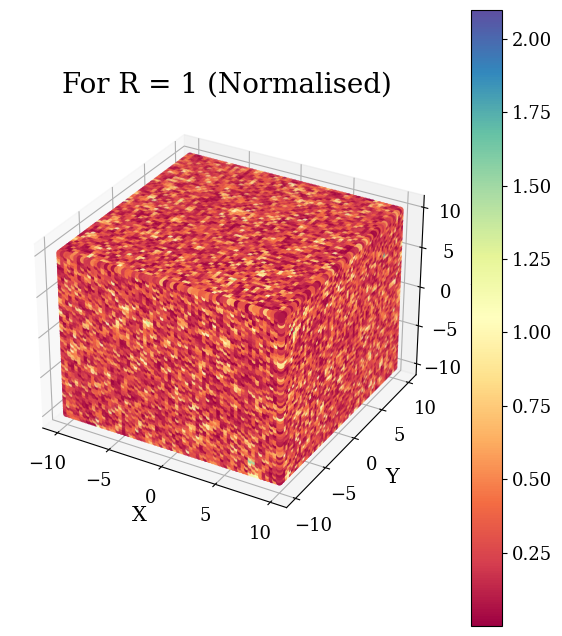

In [37]:
sphere_grid  = filter_sphere(1,64, True)

fff = np.abs(transf(grid,sphere_grid))
fig = plt.figure(figsize=(7,8))
plott(fff,'For R = 1 (Normalised)')

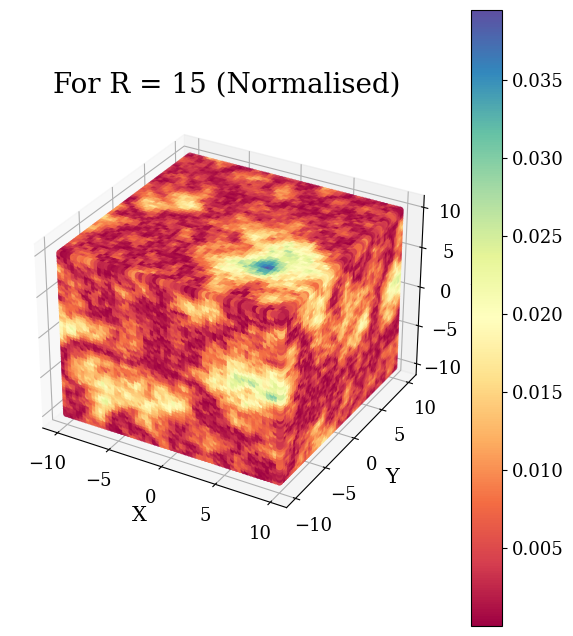

In [38]:
sphere_grid  = filter_sphere(15,64, True)

fff = np.abs(transf(grid,sphere_grid))
fig = plt.figure(figsize=(7,8))
plott(fff,'For R = 15 (Normalised)')

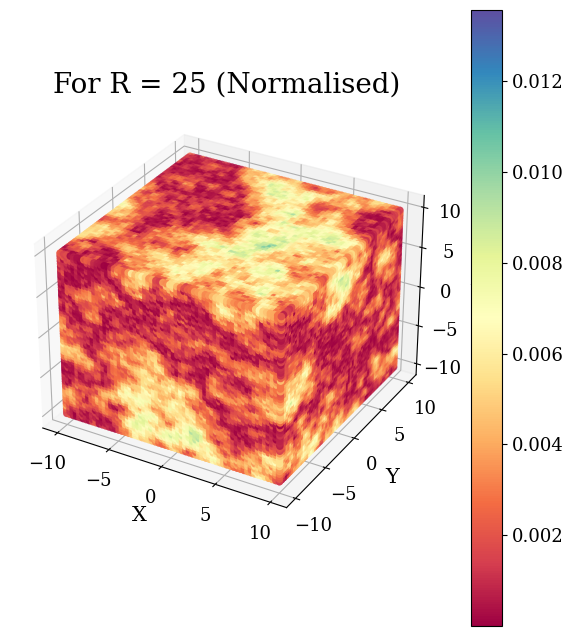

In [39]:
sphere_grid  = filter_sphere(25,64, True)

fff = np.abs(transf(grid,sphere_grid))
fig = plt.figure(figsize=(7,8))
plott(fff,'For R = 25 (Normalised)')

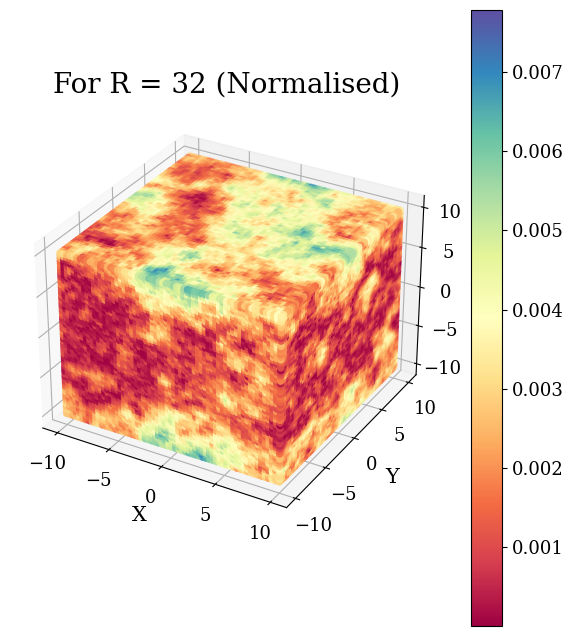

In [40]:
sphere_grid  = filter_sphere(32,64, True)

fff = np.abs(transf(grid,sphere_grid))
fig = plt.figure(figsize=(7,8))
plott(fff,'For R = 32 (Normalised)')

Text(0.5, 1.0, 'After normalisation')

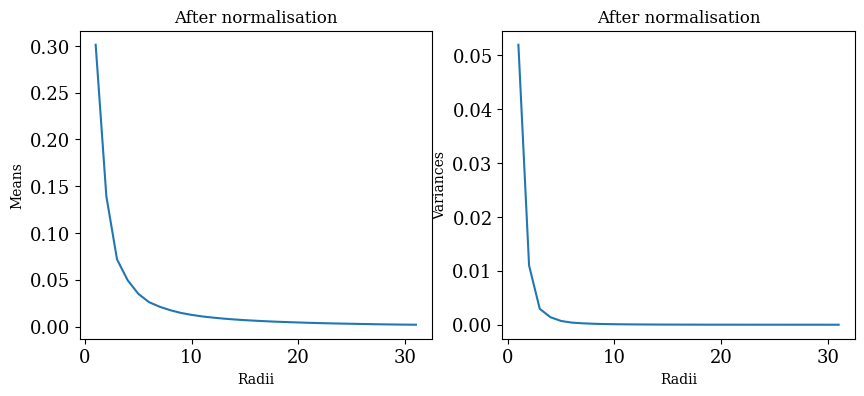

In [41]:
means=[]
variances=[]
radii = range(1,32)

for i in radii:
  sphere_grid  = filter_sphere(i,64,True)
  fff = np.abs(transf(grid,sphere_grid))
  means.append(np.mean(fff))
  variances.append(np.var(fff))

fig,axs = plt.subplots(1,2,figsize=(10,4))

axs[0].plot(radii, means)
axs[0].set_xlabel('radii')
axs[0].set_xlabel('Radii')
axs[0].set_ylabel('Means')
axs[0].set_title('After normalisation')

axs[1].plot(radii, variances)
axs[1].set_xlabel('Radii')
axs[1].set_ylabel('Variances')
axs[1].set_title('After normalisation')

**Q.What implicit assumption regarding the field has to be satisfied for this smoothing operation through convolution to work?**

 The implicit assumption regarding the field here is **periodic boundary condition**, without which we'll face border problem , same approach is used in solving cosmology related problem. Since we are not padding here periodic boundaries are assumed. Another assumption is field being spatially homogeneous means the statistical properties of field do not vary significantly over small spatial scales.